In [421]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [422]:
!rm ./out/*

In [423]:
cur_dir = %pwd

In [424]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [425]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [426]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [427]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [428]:
df = df.sort_index()

In [429]:
df.describe()

,2023-12-23T10:53:24.424343,2023-12-23T11:03:38.469366,2023-12-23T11:05:26.056371,2023-12-23T11:08:00.812929,2023-12-23T11:10:09.166399,2023-12-23T11:13:22.721985,2023-12-23T13:46:11.587411,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,9.740481e+04,1.490381e+05,1.498611e+05,4.842672e+05,4.481520e+05,5.999009e+05,2.109494e+07,2.370969e+07,2.571228e+07
std,4.027713e+05,1.086762e+06,1.087842e+06,2.190026e+06,2.003727e+06,3.329987e+06,1.815398e+08,1.833638e+08,1.999032e+08
min,1.150000e+02,1.150000e+02,2.110000e+02,2.113000e+03,1.583000e+03,1.787000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.657000e+03,7.675000e+03,7.716500e+03,1.627975e+04,1.412775e+04,1.627975e+04,1.317625e+04,2.771825e+04,2.726175e+04
50%,1.815250e+04,1.865850e+04,1.872600e+04,4.744200e+04,3.908650e+04,4.829400e+04,6.039150e+04,1.300240e+05,1.363590e+05
75%,4.732825e+04,5.028925e+04,5.080325e+04,1.726625e+05,1.533002e+05,1.844292e+05,4.794680e+05,9.573105e+05,1.020852e+06
max,7.374017e+06,2.792288e+07,2.792288e+07,3.393899e+07,2.956732e+07,6.469908e+07,3.359002e+09,3.359002e+09,3.359002e+09


In [430]:
df.iloc[:, -1].mean()

25712282.424

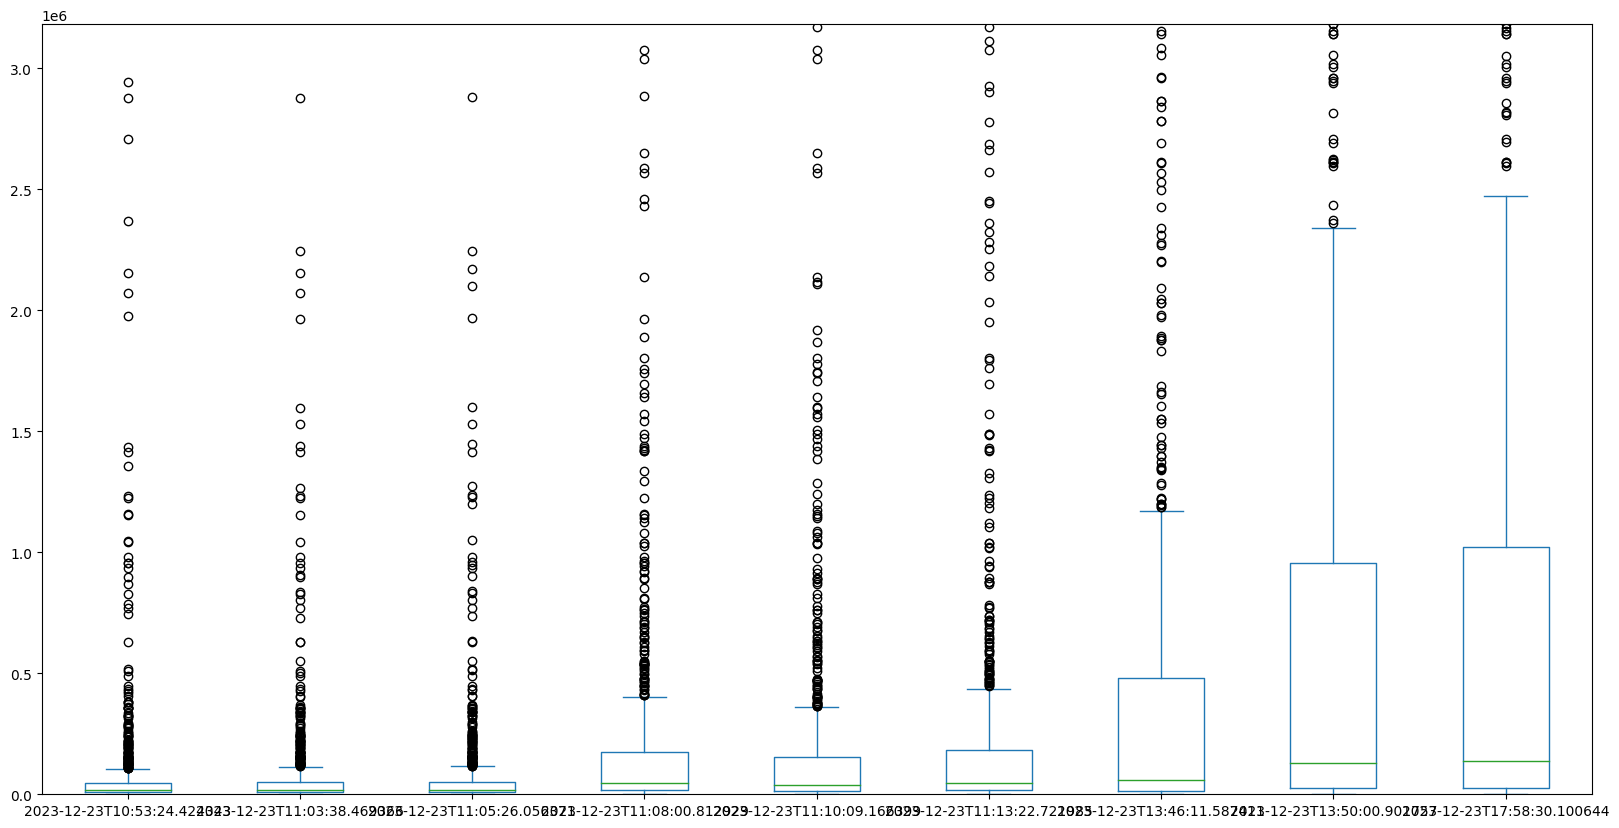

In [431]:
df.plot(kind="box", figsize=(20, 10))
plt.ylim(0, df.quantile(0.85).max())
plt.show()

In [432]:
df.to_csv("test_res.csv")

In [433]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-23T10:53:24.424343,2023-12-23T11:03:38.469366,2023-12-23T11:05:26.056371,2023-12-23T11:08:00.812929,2023-12-23T11:10:09.166399,2023-12-23T11:13:22.721985,2023-12-23T13:46:11.587411,2023-12-23T13:50:00.901757,2023-12-23T17:58:30.100644
0369.txt,746381,341501,341629,11370475,11370475,44149734,3359001574,3359001574,3359001574
0759.txt,507922,507922,511890,2650570,2650570,5335570,2775656978,2775656978,2775656978
0935.txt,1355340,10950740,10950740,19553823,19553823,5318499,1404644707,1404644707,2337570899
0517.txt,1222925,1222925,1227277,9778631,9778631,37213879,2090997431,2090997431,2090997431
0958.txt,867286,6295998,6358462,13578062,15809496,15107822,1202065134,1202065134,1824224521
...,...,...,...,...,...,...,...,...,...
0459.txt,37348,74478,75054,106542,108526,75170,174146,245826,217
0832.txt,8307,8307,8499,18333,14761,18333,173,173,209
0539.txt,40143,40143,40575,43732,33635,43732,164,164,194
0073.txt,5695,5695,5903,9496,5277,9344,8288,16288,188
